In [10]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
df = pd.read_csv("Dataset/classification/fruits.csv")
df.head()
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

## Without feature scaling

In [12]:
model = KNeighborsClassifier()
model.fit(X,y)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print("Train_score : ",accuracy_score(y_train,pred_train))
print("Test_score : ",accuracy_score(y_test,pred_test))

Train_score :  0.8125
Test_score :  1.0


## With feature Scaling(MinMaxScaler)

In [13]:
sc = MinMaxScaler(feature_range=(0,1))
X_train_new = sc.fit_transform(X_train)
X_test_new = sc.transform(X_test)

model = KNeighborsClassifier()
model.fit(X_train_new,y_train)

pred_train_new = model.predict(X_train_new)
pred_test_new = model.predict(X_test_new)

print("Train Score : ",accuracy_score(y_train,pred_train_new))
print("Test Score : ",accuracy_score(y_test,pred_test_new))

Train Score :  0.9375
Test Score :  1.0


## With feature Scaling(MaxAbsScaler)

In [39]:
from sklearn.preprocessing import MaxAbsScaler  ## Divide by bigest value 1/5,2/5,3/5.....
sc = MaxAbsScaler()
X_train_new = sc.fit_transform(X_train)
X_test_new = sc.transform(X_test)

model = KNeighborsClassifier()
model.fit(X_train_new,y_train)

pred_train_new = model.predict(X_train_new)
pred_test_new = model.predict(X_test_new)

print("Train Score : ",accuracy_score(y_train,pred_train_new))
print("Test Score : ",accuracy_score(y_test,pred_test_new))

Train Score :  0.9375
Test Score :  1.0


## With feature Scaling(StandardScaler)

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_new = sc.fit_transform(X_train)
X_test_new = sc.transform(X_test)

model = KNeighborsClassifier()
model.fit(X_train_new,y_train)

pred_train_new = model.predict(X_train_new)
pred_test_new = model.predict(X_test_new)

print("Train Score : ",accuracy_score(y_train,pred_train_new))
print("Test Score : ",accuracy_score(y_test,pred_test_new))

Train Score :  0.9375
Test Score :  1.0


## Predict Sample Testing

In [16]:
di = float(input("Enter the dimeter values"))
dw = float(input("Enter the diweight values"))

#  model.predict([[di,dw]])
sample = sc.transform([[di,dw]])

model.predict(sample)

Enter the dimeter values 4.0
Enter the diweight values 40


array(['Banana'], dtype=object)

In [17]:
## Magic Statisics
df.describe()

,diameter,weight
count,22.000000,22.000000
mean,4.604545,78.818182
std,1.666898,30.624665
min,2.300000,25.000000
25%,3.000000,52.500000
50%,4.800000,87.500000
75%,5.950000,100.000000
max,7.500000,120.000000


## Ploating visuallition this classification

In [18]:
# import lib
import matplotlib.pyplot as plt
import seaborn as sb

<function matplotlib.pyplot.show(close=None, block=None)>

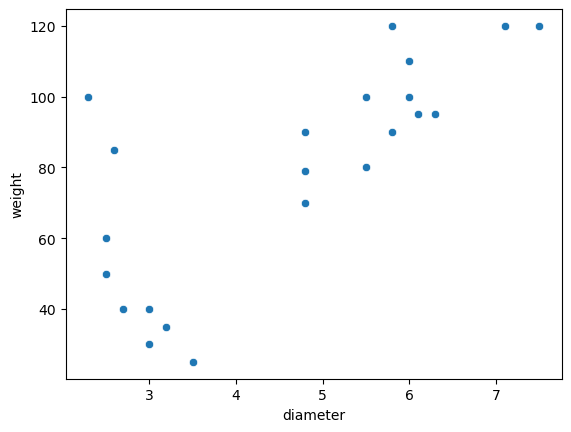

In [19]:
sb.scatterplot(x=df.diameter,y= df.weight)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

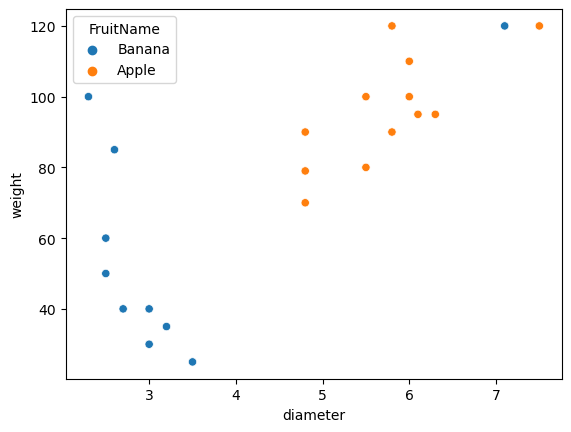

In [21]:
sb.scatterplot(x=df.diameter,y= df.weight,hue=df.FruitName)
plt.show

### Parameter   v/s Hyper-parameter

- **Parameters** are values that an object learn from data
- **Hyper-parameter** are values that we pass explicity to object

- exp:
    - in scalar object
        - minrange,maxrange are hyper-parameter
        - Xmax,xmin are parameter

## Feature Scaling with  Model hyper-parameter tuning

In [33]:
sc = MinMaxScaler(feature_range=(0,1))
X_train_new = sc.fit_transform(X_train)
X_test_new = sc.transform(X_test)

model = KNeighborsClassifier(n_neighbors=5) ## twing (N_neighbors=5(genearal_fix))
model.fit(X_train_new,y_train)

pred_train_new = model.predict(X_train_new)
pred_test_new = model.predict(X_test_new)

print("Train Score : ",accuracy_score(y_train,pred_train_new))
print("Test Score : ",accuracy_score(y_test,pred_test_new))

Train Score :  0.9375
Test Score :  1.0


In [35]:
sc = MinMaxScaler(feature_range=(0,1))
X_train_new = sc.fit_transform(X_train)
X_test_new = sc.transform(X_test)

for i in range(1,10):

    model = KNeighborsClassifier(n_neighbors=5) ## twing (N_neighbors=5(genearal_fix))
    model.fit(X_train_new,y_train)

    pred_train_new = model.predict(X_train_new)
    pred_test_new = model.predict(X_test_new)
    

    print("Neighbors ",i)
    print("Train Score : ",accuracy_score(y_train,pred_train_new))
    print("Test Score : ",accuracy_score(y_test,pred_test_new))

Neighbors  1
Train Score :  0.9375
Test Score :  1.0
Neighbors  2
Train Score :  0.9375
Test Score :  1.0
Neighbors  3
Train Score :  0.9375
Test Score :  1.0
Neighbors  4
Train Score :  0.9375
Test Score :  1.0
Neighbors  5
Train Score :  0.9375
Test Score :  1.0
Neighbors  6
Train Score :  0.9375
Test Score :  1.0
Neighbors  7
Train Score :  0.9375
Test Score :  1.0
Neighbors  8
Train Score :  0.9375
Test Score :  1.0
Neighbors  9
Train Score :  0.9375
Test Score :  1.0


In [37]:
sc = MinMaxScaler(feature_range=(0,1))
X_train_new = sc.fit_transform(X_train)
X_test_new = sc.transform(X_test)

model = KNeighborsClassifier(n_neighbors=5,metric="euclidean") 
model.fit(X_train_new,y_train)

pred_train_new = model.predict(X_train_new)
pred_test_new = model.predict(X_test_new)
print("-------------- Euclidean---------------")
print("Train Score : ",accuracy_score(y_train,pred_train_new))
print("Test Score : ",accuracy_score(y_test,pred_test_new))



model = KNeighborsClassifier(n_neighbors=5,metric="manhattan") 
model.fit(X_train_new,y_train)

pred_train_new = model.predict(X_train_new)
pred_test_new = model.predict(X_test_new)
print("-------------- Manhattan---------------")
print("Train Score : ",accuracy_score(y_train,pred_train_new))
print("Test Score : ",accuracy_score(y_test,pred_test_new))



model = KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=1) 
model.fit(X_train_new,y_train)

pred_train_new = model.predict(X_train_new)
pred_test_new = model.predict(X_test_new)
print("-------------- Minkowski with p =1  ---------------")
print("Train Score : ",accuracy_score(y_train,pred_train_new))
print("Test Score : ",accuracy_score(y_test,pred_test_new))


model = KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2) 
model.fit(X_train_new,y_train)

pred_train_new = model.predict(X_train_new)
pred_test_new = model.predict(X_test_new)
print("-------------- Minkowski with p =2  ---------------")
print("Train Score : ",accuracy_score(y_train,pred_train_new))
print("Test Score : ",accuracy_score(y_test,pred_test_new))


model = KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=3) 
model.fit(X_train_new,y_train)

pred_train_new = model.predict(X_train_new)
pred_test_new = model.predict(X_test_new)
print("-------------- Minkowski with p =3  ---------------")
print("Train Score : ",accuracy_score(y_train,pred_train_new))
print("Test Score : ",accuracy_score(y_test,pred_test_new))

-------------- Euclidean---------------
Train Score :  0.9375
Test Score :  1.0
-------------- Manhattan---------------
Train Score :  0.9375
Test Score :  1.0
-------------- Minkowski with p =1  ---------------
Train Score :  0.9375
Test Score :  1.0
-------------- Minkowski with p =2  ---------------
Train Score :  0.9375
Test Score :  1.0
-------------- Minkowski with p =3  ---------------
Train Score :  0.9375
Test Score :  1.0


## Testing Twing and Metrix

In [47]:
sc = MinMaxScaler(feature_range=(0,1))
X_train_new = sc.fit_transform(X_train)
X_test_new = sc.transform(X_test)

for i in range(1,10):

    model = KNeighborsClassifier(n_neighbors=i,metric="euclidean") ## twing (N_neighbors=5(genearal_fix))
    model.fit(X_train_new,y_train)

    pred_train_new = model.predict(X_train_new)
    pred_test_new = model.predict(X_test_new)
    

    print("Neighbors & euclidean",i)
    print("Train Score : ",accuracy_score(y_train,pred_train_new))
    print("Test Score : ",accuracy_score(y_test,pred_test_new))
    
    
    
sc = MinMaxScaler(feature_range=(0,1))
X_train_new = sc.fit_transform(X_train)
X_test_new = sc.transform(X_test)

for i in range(1,5):

    model = KNeighborsClassifier(n_neighbors=i,metric="manhattan") 
    model.fit(X_train_new,y_train)

    pred_train_new = model.predict(X_train_new)
    pred_test_new = model.predict(X_test_new)
    

    print("Neighbors & manhattan",i)
    print("Train Score : ",accuracy_score(y_train,pred_train_new))
    print("Test Score : ",accuracy_score(y_test,pred_test_new))
    
    
for i in range(1,5):

    model = KNeighborsClassifier(n_neighbors=i,metric="minkowski",p=i) 
    model.fit(X_train_new,y_train)

    pred_train_new = model.predict(X_train_new)
    pred_test_new = model.predict(X_test_new)
    

    print("Neighbors & Minkowski",i)
    print("Train Score : ",accuracy_score(y_train,pred_train_new))
    print("Test Score : ",accuracy_score(y_test,pred_test_new))
    
    

Neighbors & euclidean 1
Train Score :  1.0
Test Score :  1.0
Neighbors & euclidean 2
Train Score :  0.9375
Test Score :  1.0
Neighbors & euclidean 3
Train Score :  0.9375
Test Score :  1.0
Neighbors & euclidean 4
Train Score :  0.9375
Test Score :  1.0
Neighbors & euclidean 5
Train Score :  0.9375
Test Score :  1.0
Neighbors & euclidean 6
Train Score :  0.8125
Test Score :  1.0
Neighbors & euclidean 7
Train Score :  0.875
Test Score :  1.0
Neighbors & euclidean 8
Train Score :  0.6875
Test Score :  0.6666666666666666
Neighbors & euclidean 9
Train Score :  0.875
Test Score :  0.8333333333333334
Neighbors & manhattan 1
Train Score :  1.0
Test Score :  1.0
Neighbors & manhattan 2
Train Score :  0.9375
Test Score :  1.0
Neighbors & manhattan 3
Train Score :  0.9375
Test Score :  1.0
Neighbors & manhattan 4
Train Score :  0.9375
Test Score :  1.0
Neighbors & Minkowski 1
Train Score :  1.0
Test Score :  1.0
Neighbors & Minkowski 2
Train Score :  0.9375
Test Score :  1.0
Neighbors & Minkowski

In [52]:
sc = MinMaxScaler(feature_range=(0,1))
X_train_new = sc.fit_transform(X_train)
X_test_new = sc.transform(X_test)

for i in range(1,5):
    for j in range(1,i):
            model = KNeighborsClassifier(n_neighbors=i,metric="minkowski",p=j) ## twing (N_neighbors=5(genearal_fix))
            model.fit(X_train_new,y_train)

            pred_train_new = model.predict(X_train_new)
            pred_test_new = model.predict(X_test_new)


            print("Neighbors & Minkowski",i)
            print("Train Score : ",accuracy_score(y_train,pred_train_new))
            print("Test Score : ",accuracy_score(y_test,pred_test_new))



Neighbors & Minkowski 2
Train Score :  0.9375
Test Score :  1.0
Neighbors & Minkowski 3
Train Score :  0.9375
Test Score :  1.0
Neighbors & Minkowski 3
Train Score :  0.9375
Test Score :  1.0
Neighbors & Minkowski 4
Train Score :  0.9375
Test Score :  1.0
Neighbors & Minkowski 4
Train Score :  0.9375
Test Score :  1.0
Neighbors & Minkowski 4
Train Score :  0.9375
Test Score :  1.0
